In [1]:
import pandas as pd
from datetime import datetime 


In [2]:
data = pd.read_csv("Alcohol_Sales.csv")
data

,DATE,units_sold
0,January-92,3459
1,February-92,3458
2,March-92,4002
3,April-92,4564
4,May-92,4221
...,...,...
320,September-18,12396
321,October-18,13914
322,November-18,14174
323,December-18,15504


In [3]:
'''
1. The date information is in a non-standard format. You will need to convert it to a datetime. The 
function strptime() is one way to do this as shown in this link.  
'''
string_data = data['DATE'].values
timestamp_data = [datetime.strptime(x, '%B-%y') for x in string_data] 
  
data['DATE'] = pd.DataFrame(timestamp_data, columns=['Date']) 
data

,DATE,units_sold
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [4]:
'''
2. Make the date value an index using set_index() 
'''
data.set_index('DATE', inplace=True)
data

,units_sold
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


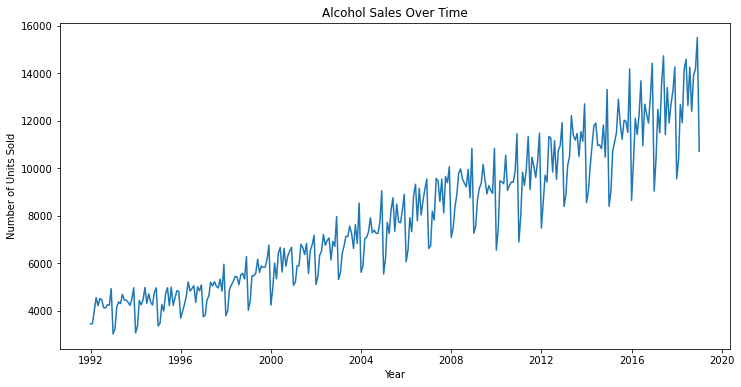

In [5]:
'''
3. Plot the number of units sold vs time. Answer the following: 
a. Are data independent? 
b. Is the data stationery?
'''
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Number of Units Sold')
plt.title('Alcohol Sales Over Time')
plt.show()


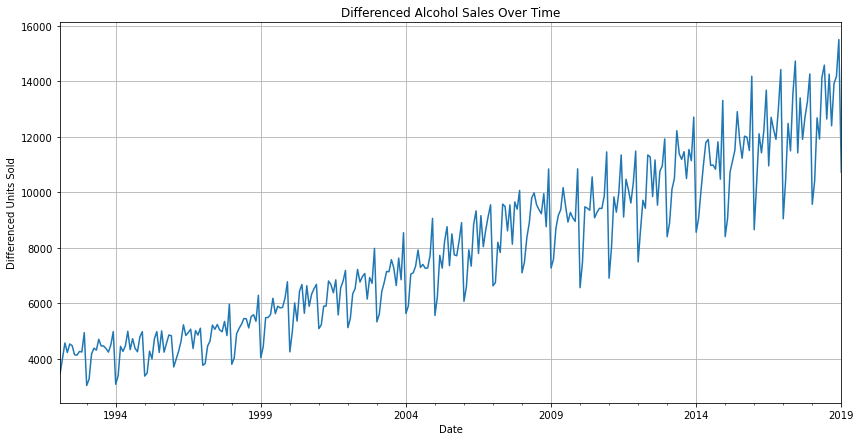

In [7]:
'''
4. Make the data stationery using differencing. This link shows several methods for differencing. 
Use shift(). 
'''
df = data.copy()

# Differencing the series
df['units_sold_diff'] = df['units_sold'] - df['units_sold'].shift(1)

# Drop the Na
df.dropna(inplace=True)

plt.figure(figsize=(14, 7))
df['units_sold'].plot(title='Differenced Alcohol Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Units Sold')
plt.grid(True)
plt.show()

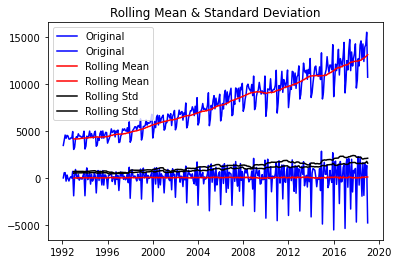

ADF Statistic: -4.365959619245999
p-value: 0.00034082849211707647
Critical Values:
	1%: -3.451621854687657
	5%: -2.870908950689806
	10%: -2.571761810613944


In [8]:
'''5. The link above provides a function for determining if the differencing made the data stationery. I 
have reproduced it here, removing the hard coded variable name. Use this function to test 
whether the series is stationary. 
'''
from statsmodels.tsa.stattools import adfuller
def get_stationarity(timeseries, varname): 
    """Title: get_stationerity 
    Function for testing whether time series data is stationery. 
 
    Args: 
        timeseries - Dateframe containing time series 
        varname - Name of the column containing the series values 
    """ 
    # rolling statistics 
    rolling_mean = timeseries.rolling(window=12).mean() 
    rolling_std = timeseries.rolling(window=12).std() 
     
    # rolling statistics plot 
    original = plt.plot(timeseries, color='blue', label='Original') 
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean') 
    std = plt.plot(rolling_std, color='black', label='Rolling Std') 
    plt.legend(loc='best') 
    plt.title('Rolling Mean & Standard Deviation') 
    plt.show(block=False) 
     
    # Dickey–Fuller test: 
    result = adfuller(timeseries[varname]) 
    print('ADF Statistic: {}'.format(result[0])) 
    print('p-value: {}'.format(result[1])) 
    print('Critical Values:') 
    for key, value in result[4].items(): 
        print('\t{}: {}'.format(key, value))

get_stationarity(df, 'units_sold_diff')

<Figure size 1008x504 with 0 Axes>

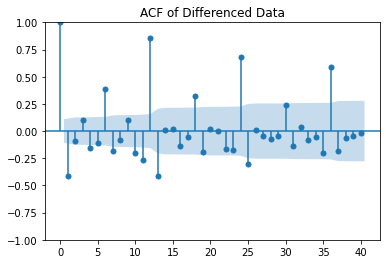

D:\software\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1008x504 with 0 Axes>

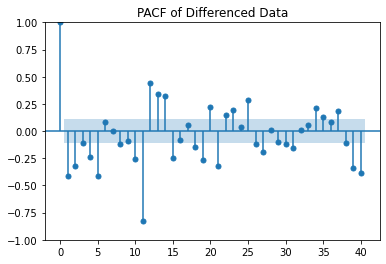

In [12]:
'''
6. Generate ACF and PACF plots of this data. For how to create the plots, see this link. The function 
plot_pacf is also available in statsmodels. Interpret the plots.  
a. Would a time series model be appropriate?  
b. Is there a seasonal pattern to the series? 
'''
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(14, 7))
plot_acf(df['units_sold_diff'], lags=40)
plt.title('ACF of Differenced Data')
plt.show()

# Plot PACF
plt.figure(figsize=(14, 7))
plot_pacf(df['units_sold_diff'], lags=40)
plt.title('PACF of Differenced Data')
plt.show()
